In [1]:
try:
    import pandas as pd
    import numpy as np
    import csv
    import json
    import os
    import matplotlib.pyplot as plt

    
except Exception as E:
    print('Some modules are missing')

In [2]:
!ls ../smart-2022-datasets/

AT_answer_type_prediction  LICENSE    RL_relation_linking
EL_entity_linking	   README.md


In [3]:
gpath = '../smart-2022-datasets/'

AT = gpath + 'AT_answer_type_prediction'

In [6]:
at_db_train_fpath = os.path.join(gpath, 'AT_answer_type_prediction/wikidata/SMART2022-AT-wikidata-train.json')

In [19]:
with open(at_db_train_fpath, 'r') as f:
    at_db_train = json.load(f)

In [20]:
len(at_db_train)

43554

In [21]:
at_db_train[1]

{'id': 1,
 'question': "Who is the child of Ranavalona I's husband?",
 'category': 'resource',
 'type': ['person', 'omnivore', 'natural person']}

In [22]:
at_db_train[2]

{'id': 2,
 'question': 'Is it true Jeff_Bridges occupation Lane Chandler and photographer ?',
 'category': 'boolean',
 'type': ['boolean']}

In [23]:
categories = []
num_types = []
types = []

for entry in at_db_train:
    categories.append(entry['category'])
    num_types.append(len(entry['type']))
    types.append(entry['type'])

types = [a for sublist in types for a in sublist]
num_types = np.array(num_types)

In [24]:
t, c = np.unique(types, return_counts=True)
ind = np.argsort(-c)

In [25]:
[f'{t[ind[i]]}: {c[ind[i]]}' for i in range(len(t))]

['person: 6891',
 'natural person: 6821',
 'omnivore: 6821',
 'state: 4166',
 'country: 3959',
 'political territorial entity: 3937',
 'human settlement: 3301',
 'city: 2773',
 'boolean: 2138',
 'string: 2110',
 'city/town: 2078',
 'community: 1794',
 'identity: 1771',
 'sex: 1767',
 'gender: 1767',
 'art genre: 1687',
 'democracy: 1658',
 'republic: 1654',
 'federal system: 1629',
 'visual artwork: 1616',
 'urban area: 1597',
 'audiovisual work: 1541',
 'date: 1414',
 'nation: 1358',
 'historical country: 1302',
 'state with limited recognition: 1263',
 'languoid: 1203',
 'human language: 1190',
 'series: 1176',
 'moving image: 1154',
 'position: 1149',
 'municipal corporation in the United States: 1149',
 'number: 1037',
 'aspect of music: 1014',
 'big city: 994',
 'like a city: 935',
 'creative work: 857',
 'municipality: 729',
 'class: 704',
 'sovereign state: 701',
 'organization: 651',
 'seat: 650',
 'occupation: 589',
 'first-level administrative country subdivision: 574',
 'wor

### Distribution of all possible answer types

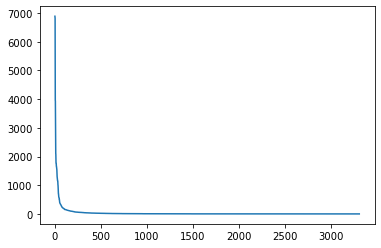

In [26]:
plt.plot(c[ind])

#### Possible number of answer types for a particular question

In [27]:
np.unique(num_types)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [28]:
at_db_train[np.where(num_types==627)[0][1]]

IndexError: index 1 is out of bounds for axis 0 with size 0

In [29]:
at_db_train[np.where(num_types==627)[0][2]]

IndexError: index 2 is out of bounds for axis 0 with size 0

In [30]:
at_db_train[np.where(num_types==93)[0][0]]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [9]:
at_db_train[np.where(num_types==93)[0][1]]

NameError: name 'num_types' is not defined

In [14]:
len(np.where(num_types==1)[0])

11515

In [20]:
len(np.where(num_types==627)[0])

3

In [21]:
len(np.where(num_types==93)[0])

1

### after removing multiple answer types for a particular question

In [24]:
categories = []
num_types = []
types = []

for entry in at_db_train:
    categories.append(entry['category'])
    num_types.append(len(np.unique(entry['type'])))
    types.append(np.unique(entry['type']))

types_merged = [a for sublist in types for a in sublist]
num_types = np.array(num_types)

In [25]:
t, c = np.unique(types_merged, return_counts=True)
ind = np.argsort(-c)

### New distribution of answer types

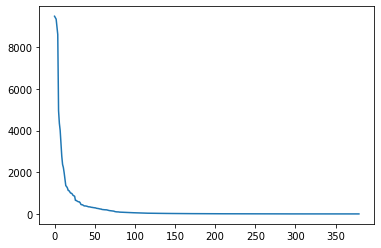

In [26]:
plt.plot(c[ind])

In [27]:
np.unique(num_types)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 23, 27, 31])

In [33]:
[len(np.where(num_types==x)[0]) for x in np.unique(num_types)]

[11560, 7340, 4578, 4556, 5161, 2425, 492, 411, 85, 31, 5, 19, 1, 1, 5]

### 21 Aug 2022

In [32]:
categories = []
num_types = []
types = []

for entry in at_db_train:
    categories.append(entry['category'])
    num_types.append(len(np.unique(entry['type'])))
    types.append(np.unique(entry['type']))
    
categories = np.array(categories)
num_types = np.array(num_types)
types = np.array(types, dtype=object)
#types = [a for sublist in types for a in sublist]

In [33]:
len(categories)

36670

In [34]:
len(types)

36670

In [35]:
types.shape

(36670,)

In [42]:
print(np.sum(categories=='boolean'))
print(np.sum(categories=='literal'))
print(np.sum(categories=='resource'))

2227
4217
30226


In [51]:
resource_types = types[np.where(categories=='resource')[0]]

In [65]:
xx = np.unique(np.array([len(resource_types[x]) for x in range(len(resource_types))]))

In [75]:
yy = [np.sum([True for t in resource_types if len(t)==num]) for num in xx]

Text(0, 0.5, 'Number of questions')

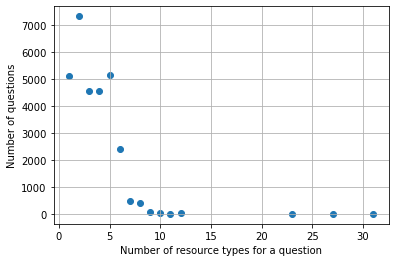

In [80]:
plt.scatter(xx,yy)
plt.grid('on')
plt.xlabel('Number of resource types for a question')
plt.ylabel('Number of questions')